In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


TEAM UNO


Dave
Sal
Tim
Jose


In [261]:
# 1

spend_df = pd.read_csv("Freshmart.csv")
# spend_df = pd.read_csv("\data\Freshmart.csv")

In [262]:
spend_df.head(20)

,group,spend
0,App User,65.450712
1,App User,55.926035
2,App User,67.715328
3,App User,80.845448
4,App User,54.487699
5,App User,54.487946
6,App User,81.688192
7,App User,69.511521
8,App User,50.957884
9,App User,66.138401


In [263]:
spend_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   group   400 non-null    object 
 1   spend   400 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.4+ KB


In [264]:
spend_df.groupby("group")["spend"].describe()

,count,mean,std,min,25%,50%,75%,max
group,,,,,,,,
App User,200.0,57.388436,13.965059,18.703823,47.423085,57.937122,65.512787,98.802537
Non-User,200.0,53.288023,14.805057,3.380990,42.912437,53.182590,62.308467,109.790972


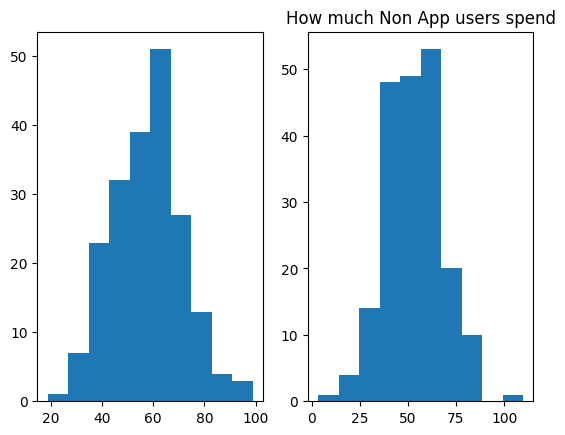

In [265]:
app_users = spend_df[spend_df["group"]=="App User"]["spend"]
non_app_users = spend_df[spend_df["group"]=="Non-User"]["spend"]

fig, ax=plt.subplots(1,2)

ax[0].hist(app_users, bins=10)
plt.title("How much App users spend")


ax[1].hist(non_app_users, bins=10)
plt.title("How much Non App users spend")
plt.show()


In [266]:
# Yes, both hist have a evenly distributed bell shape. Do the T test

# Part 2 – Independent t-Test

### Null: There was no change with users spending more.
### Alternate: App users spend more when using their app.

In [267]:
group_a = spend_df[spend_df['group'] == 'App User']['spend']
group_b = spend_df[spend_df['group'] == 'Non-User']['spend']
t_stat, p_val = stats.ttest_ind(group_a, group_b, equal_var=False)
print("Two-sample t-test:")
print("T-statistic:", t_stat)
print("P-value:", p_val)

# We will need to reject the null hypothesis due to the p-value being lower than .05.

Two-sample t-test:
T-statistic: 2.849252420752362
P-value: 0.004610620601609663


# Part 3 – Simulating Best-Case and Worst-Case Monthly Profit

57.388435522418725 13.96505872810502 53.288022803483145 14.805057165330638


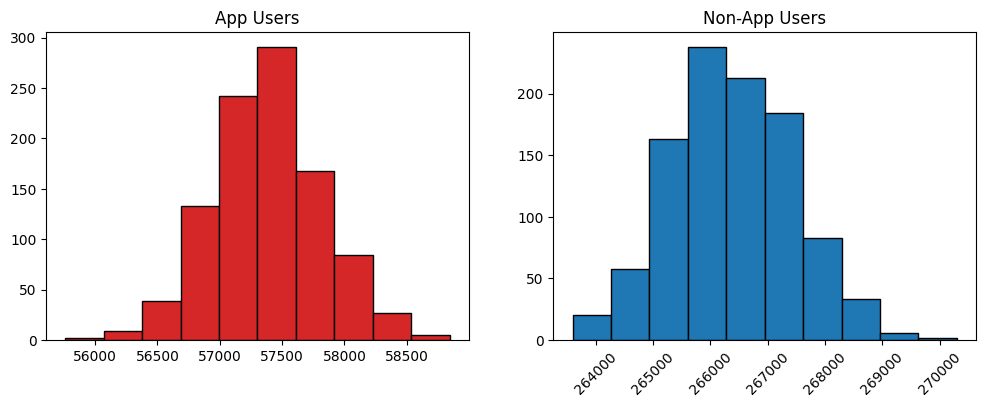

In [268]:
group_a_mean = group_a.mean()
group_a_std = group_a.std()
group_b_mean = group_b.mean()
group_b_std = group_b.std()
print(group_a_mean, group_a_std, group_b_mean, group_b_std)

fixed_cost = 292000

app_users_normal = np.random.normal(loc=group_a_mean, scale=group_a_std, size=1000)
non_app_users_normal = np.random.normal(loc=group_b_mean, scale=group_b_std, size=5000)

def create_new_hist(app, non_app):
    fig, ax = plt.subplots(1, 2, figsize=(12,4))
    ax[0].hist(app, bins=10, color = "tab:red", edgecolor="black")
    ax[0].set_title("App Users")
    ax[1].hist(non_app, bins=10, color = "tab:blue", edgecolor="black", )
    plt.xticks(rotation = 45)
    ax[1].set_title("Non-App Users")
    plt.show()

def simulation_hist(size, app_users_normal, non_app_users_normal):
    app_users_list = []
    non_app_user_list = []
    for number in range(size):
        app_users_normal = np.random.normal(loc=group_a_mean, scale=group_a_std, size=1000)
        non_app_users_normal = np.random.normal(loc=group_b_mean, scale=group_b_std, size=5000)
        app_users_list.append(sum(app_users_normal))
        non_app_user_list.append(sum(non_app_users_normal))
    create_new_hist(app_users_list, non_app_user_list)
    return app_users_list, non_app_user_list
app_and_non_app = simulation_hist(1000, 1000, 5000)

In [269]:
scenarios = 10000
app_users_this_month  = 1000
non_users_this_month  = 5000
fixed_costs_this_month = 292000
app_spend_simulation = np.random.normal(loc=group_a_mean, scale=group_a_std, size=(scenarios, app_users_this_month))
non_spend_simulation = np.random.normal(loc=group_b_mean, scale=group_b_std, size=(scenarios, non_users_this_month))
total_spend_simulation = app_spend_simulation.sum(axis=1) + non_spend_simulation.sum(axis=1)
net_profit_simulation = total_spend_simulation - fixed_costs_this_month
print("Estimated profit (mean):", net_profit_simulation.mean())
print("Best-case profit (max): ", net_profit_simulation.max())
print("Worst-case profit (min):", net_profit_simulation.min())

Estimated profit (mean): 31840.443224130784
Best-case profit (max):  36915.87757757085
Worst-case profit (min): 27447.401902359095


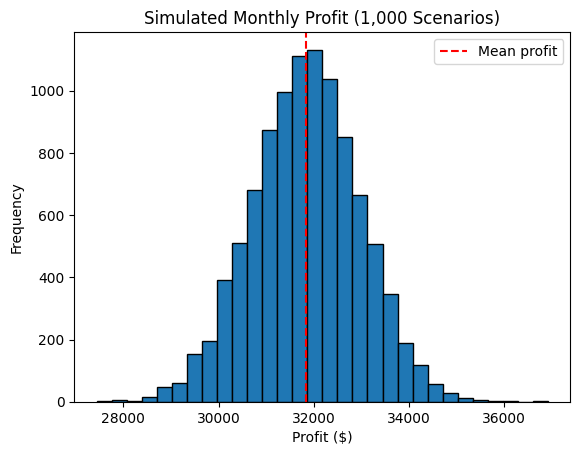

In [270]:
plt.hist(net_profit_simulation, bins=30, edgecolor="black")
plt.title("Simulated Monthly Profit (1,000 Scenarios)")
plt.xlabel("Profit ($)")
plt.ylabel("Frequency")
plt.axvline(net_profit_simulation.mean(), color="red", linestyle="--", label="Mean profit")
plt.legend()
plt.show()

##### What is the average simulated profit?

##### What are the 5th and 95th percentiles of the simulated profit?



In [271]:
average_net_profit = net_profit_simulation.mean()
print(average_net_profit)

31840.443224130784


In [272]:
profit_5th = np.percentile(net_profit_simulation, 5)
profit_95th = np.percentile(net_profit_simulation, 95)

print(profit_5th, profit_95th)

30002.51404930592 33661.591878467654


In [273]:
# ##### Explain how we could use this information to guide future spending decisions. In the 5th percent worst case, how much money could they reasonably risk spending if they wanted to remain profitable for shareholders?
'''Average profit = what we expect most months.
5th percentile (worst case) = how little we might make in a bad month.
95th percentile (best case) = how much we might make in a strong month.
'''

'Average profit = what we expect most months.\n5th percentile (worst case) = how little we might make in a bad month.\n95th percentile (best case) = how much we might make in a strong month.\n'

ADVANCED SECTION

In [274]:
# Assuming that both App Users and Non-Users spend $5 less on average

group_a_mean_lower = group_a_mean - 5
group_a_std = group_a.std()
group_b_mean_lower = group_b_mean - 5
group_b_std = group_b.std()

scenarios = 10000
app_users_this_month  = 1000
non_users_this_month  = 5000
fixed_costs_this_month = 292000
app_spend_simulation = np.random.normal(loc=group_a_mean_lower, scale=group_a_std, size=(scenarios, app_users_this_month))
non_spend_simulation = np.random.normal(loc=group_b_mean_lower, scale=group_b_std, size=(scenarios, non_users_this_month))
total_spend_simulation = app_spend_simulation.sum(axis=1) + non_spend_simulation.sum(axis=1)
net_profit_simulation_lower = total_spend_simulation - fixed_costs_this_month

average_net_profit_lower = net_profit_simulation_lower.mean()
print(average_net_profit_lower)

1824.820019094725
